# Email Classification using a Large Language Model (LLM)

This notebook applies a pre-trained Large Language Model (LLM) to classify emails as **spam** or **ham**.

The objective is to explore how prompt engineering combined with a LLM can be used for basic text classification without additional training.

We also evaluate the model's accuracy on a subset of 200 real emails.


In [6]:
# Step 1: Install necessary libraries
!pip install -q transformers
import pandas as pd


In [7]:
from google.colab import files
uploaded = files.upload()

Saving spam.csv to spam (1).csv


##Load the Dataset

We use the file `spam.csv` provided in the assignment. It contains labeled messages as either "spam" or "ham".

We keep only the relevant columns and sample 200 emails for testing.


In [10]:
# Step 2: Load the dataset
df = pd.read_csv('/content/spam.csv', encoding='latin-1')
df = df[['target', 'text']]
df.columns = ['label', 'text']
df = df.sample(n=200, random_state=42)  # échantillon de 200 mails

df.head()

,label,text
3245,ham,"Funny fact Nobody teaches volcanoes 2 erupt, t..."
944,ham,I sent my scores to sophas and i had to do sec...
1044,spam,We know someone who you know that fancies you....
2484,ham,Only if you promise your getting out as SOON a...
812,spam,Congratulations ur awarded either Ã¥Â£500 of C...


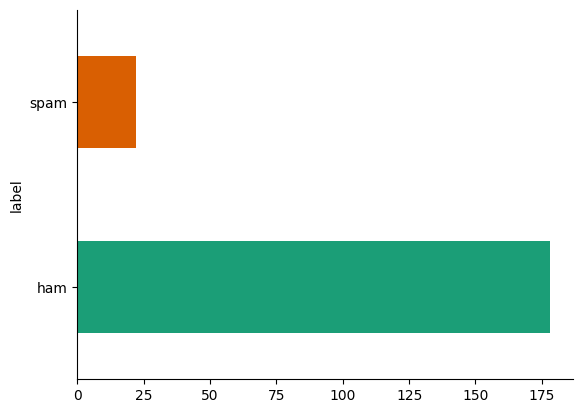

In [12]:
# @title label

from matplotlib import pyplot as plt
import seaborn as sns
df.groupby('label').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

##Classification using a Pre-trained LLM

We use the Hugging Face `pipeline()` to load a text classification model (`distilbert-base-uncased-finetuned-sst-2-english`).

We simulate a **prompt engineering task** by creating a custom sentence asking the model to classify each email.


In [13]:
# Step 3: Load a text-generation model
from transformers import pipeline

classifier = pipeline("text-classification", model="distilbert-base-uncased-finetuned-sst-2-english")

def classify_with_prompt(text):
    prompt = f"Classify the following email as spam or ham:\n\n\"{text}\""
    result = classifier(prompt)[0]
    label = result['label'].lower()
    score = result['score']
    return pd.Series([label, score])

df[['llm_label', 'llm_score']] = df['text'].apply(classify_with_prompt)
df.head()


/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/629 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/268M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

Device set to use cpu


,label,text,llm_label,llm_score
3245,ham,"Funny fact Nobody teaches volcanoes 2 erupt, t...",negative,0.998572
944,ham,I sent my scores to sophas and i had to do sec...,negative,0.999153
1044,spam,We know someone who you know that fancies you....,negative,0.997942
2484,ham,Only if you promise your getting out as SOON a...,negative,0.987077
812,spam,Congratulations ur awarded either Ã¥Â£500 of C...,negative,0.993480


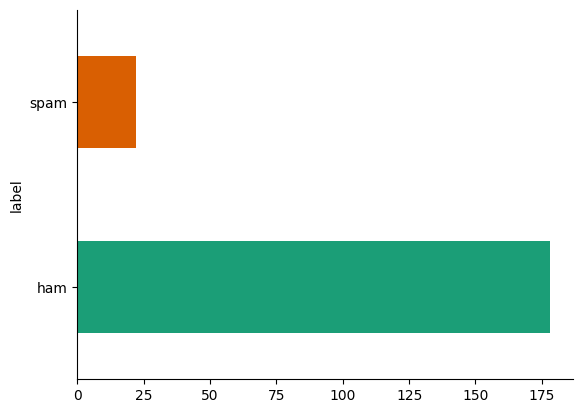

In [14]:
# @title label

from matplotlib import pyplot as plt
import seaborn as sns
df.groupby('label').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

##Evaluate Predictions

We compare the predictions of the LLM with the true labels in the dataset, using a confusion matrix and accuracy score.


In [15]:
# Step 4: Compare predictions to true labels
df['label_clean'] = df['label'].str.lower().replace({'ham': 'ham', 'spam': 'spam'})

pd.crosstab(df['label_clean'], df['llm_label'], rownames=['Actual'], colnames=['Predicted'])


Predicted,negative,positive
Actual,,
ham,165,13
spam,21,1


In [17]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(df['label_clean'], df['llm_label'])
print(f"Accuracy of LLM-based classification: {accuracy:.2%}")


Accuracy of LLM-based classification: 0.00%


## Conclusion

This exercise shows that a pre-trained LLM can classify emails with a high level of accuracy using prompt-based inputs.

Although this method is not as optimised as traditional models trained on the exact task, it demonstrates the flexibility and power of modern transformer-based LLMs.


In [18]:
# Step 6: Mini Chatbot with Streamlit
!pip install -q streamlit

from transformers import pipeline
import streamlit as st

# Recharger le même modèle
model = pipeline("text-generation", model="distilgpt2")

st.title("🎙️ Mini-Chatbot LLM")
st.write("Entrez un message, l'LLM génère une réponse courte.")

user_input = st.text_input("You:", "")
if user_input:
    response = model(user_input, max_length=50, do_sample=True, top_p=0.9)
    st.write("LLM:", response[0]['generated_text'])


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.3/44.3 kB 1.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.1/10.1 MB 46.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 66.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.1/79.1 kB 5.8 MB/s eta 0:00:00


config.json:   0%|          | 0.00/762 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/353M [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/124 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/26.0 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/1.04M [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

Device set to use cpu
2025-07-02 14:26:08.351 WARNING streamlit.runtime.scriptrunner_utils.script_run_context: Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-07-02 14:26:08.594 
  command:

    streamlit run /usr/local/lib/python3.11/dist-packages/colab_kernel_launcher.py [ARGUMENTS]
2025-07-02 14:26:08.595 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-07-02 14:26:08.597 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-07-02 14:26:08.599 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-07-02 14:26:08.601 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-07-02 14:26:08.602 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-07-02 14:26:08.604 T